# THE BASICS

## Tensor Orders


1. $1^{st}$-Order Tensors - Vectors

    A $1^{st}$-Order Tensor is either a row or column vector. We often see it denoted as having shape of either $\mathbb{R}^{Mx1}$ or $\mathbb{R}^{1xN}$. Here, M dictates the number of rows (elements) in the column vector. N dictates the number of columns (elements) in the row vector. $\mathbb{R}$ represents the overall state of the $1^{st}$-Order tensor. It means that the tensor is constructed of all real values and is in the shape of {M x 1} or {1 x N}.
    
    $$
        A = 
        \begin{bmatrix}
        1 & 2 & 3
        \end{bmatrix}
    $$

    Where **A** is a 1 x 3 Vector

    $$
        B = 
        \begin{bmatrix}
        4 \\ 5 \\ 6
        \end{bmatrix}
    $$

    Where **B** is a 3 x 1 matrix.


2. $2^{nd}$-Order Tensors - Matrices

    A $2^{nd}$-Order Tensor is a matrix. Throughout the tutorial, we will only deal with real numbers. Therefore if **A** is a $2^{nd}$-Order Tensor having **M** rows and **N** columns, then A $\in \mathbb{R}^{MxN}$.

    $$
      A = 
      \begin{bmatrix}
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9
      \end{bmatrix}
    $$

    $ A \in \mathbb{R}^{3x3} $

3. $3^{rd}$-Order Tensors - Cubes

    A $3^{rd}$-Order Tensors can be thought of as a cube or stacked matrices. Therefore if **A** is a $3^{rd}$-Order Tensor having K instances of matrices of shape I rows and J columns, it would be denoted as **A** $\in \mathbb{R}^{IxJxK}$

    $$
        A = 
        \begin{bmatrix}
            \begin{bmatrix}
                1 & 2 & 3 \\
                4 & 5 & 6 \\
                7 & 8 & 9 \\
                10 & 11 & 12
            \end{bmatrix}
            \begin{bmatrix}
                11 & 12 & 13 \\
                14 & 15 & 16 \\
                17 & 18 & 19 \\
                20 & 21 & 22
            \end{bmatrix}
            \begin{bmatrix}
                31 & 32 & 33 \\
                34 & 35 & 36 \\
                37 & 38 & 39 \\
                40 & 41 & 42
            \end{bmatrix}
        \end{bmatrix}
    $$

    
       $$ A \in \mathbb{R}^{4x3x3}$$
    

## Factorization


To understand the premise of this paper (this method) we first need to get an understanding and intrinsic level of intuition for factorization. 

### Example 1
Let's start with simple number factorization. If I give the number 24 and ask for the lowest factors possible, we can see that those factors are 3 and 2. This means that as long as I have both 3 and 2, I can reproduce 24. These are the most important building blocks of 24.

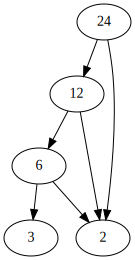

In [1]:

from graphviz import Digraph
# Create Digraph object
dot = Digraph()

# Add nodes
dot.node('a', '24')
dot.node('b', '12')
dot.node('c', '2')
dot.node('d','6')
dot.node('e','3')

# Add edges
dot.edges(['ab', 'ac', 'bd', 'bc', 'de', 'dc'])

# Visualize the graph
dot

### Example 2

If **X** is defined as the set of numbers in:

$$
\{1,3,6,9,18,27,36,54,81,162\}
$$

We can actually store all the information we need about this set in the form of:

$$
\{1,3,6,9\}
$$

And this is becuase as long as we have these 4 numbers, we can create every value in **X**.


### Example 3


For a more relevant example. If the matrix **A** $\in \mathbb{R}^{4x4}$ is defined as:
$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

We can actually find two vectors that encompass all the information in *A* but in a reduced form. Without formal proof, the two vectors:

$$
v1 = 
\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}

, 

v2 = 
\begin{bmatrix}
1 \\ 6 \\ 3 \\ 9
\end{bmatrix}
$$

Will reproduce **A** when the outer product is taken between v1 and v2:

$$
v1 \otimes v2 = 

\begin{bmatrix}
2 \\ 7 \\ 4 \\ 1
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 6 & 3 & 9
\end{bmatrix}
=
\begin{bmatrix}
2*1 & 2*6 & 2*3 & 2*9 \\
7*1 & 7*6 & 7*3 & 7*9 \\
4*1 & 4*6 & 4*3 & 4*9 \\
1*1 & 1*6 & 1*3 & 1*9
\end{bmatrix}
=
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$


### A Note on Rank

You'll notice that v1 and v2 are both 1-D vectors that when the outer product is taken, creates a 4x4 matrix **A**. Since both of these vectors a matrices of 1 column (or row), it is said that the resultant matrix **A** is a ***RANK 1*** matrix. Now, depending on what source or post you read, you'll get conflicting information on what the rank of a tensor or matrix is. For example, if we read the definition for rank of a tensor on Tensorflow's site, it says the rank is simply the number of dimensions of the tensor:

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/tf_rank.png'>



Yet this is inaccurate in the context of this paper. Wikipedia actually gives a better definition of tensor rank

<img src='https://scratchpaper.s3.amazonaws.com/tensor_topic_analysis/rank_wiki.png'>

> The rank of a tensor is the minimum number of simple tensors that sum to T

I bring this up because it is paramount we understand the meaning of rank in the context of this paper. This frist definition (from Tensorflow) you will actually see in a multitude of place including Wolfram. 



#### Problem with Rank as Dimensions

As seen in the previous example with matrix

$$
A = 
\begin{bmatrix}
2 & 12 & 6 & 18 \\
7 & 42 & 21 & 63 \\
4 & 24 & 12 & 36 \\
1 & 6 & 3 & 9
\end{bmatrix}
$$

The basic definition would have you believe the rank of this matrix is 2 since there are two dimensions {rows} and {columns}. But we saw that **A** actually decomposes to **v1** and **v2**, each a column (or row) vector. Since A is a linear combination of single column vectors, it is rank is actually 1. 


To demonstrate a rank 2 matrix, if we had matrix **B**

$$
B = 
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Without formal proof, **B** could decompose to **v1** and **v2** of:

$$
B =
\begin{bmatrix}
1 & 6 \\
2 & 8 \\
3 & 9 \\
4 & 5
\end{bmatrix}_{v1}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1 \\
1 & 4 & 7 & 5
\end{bmatrix}_{v2}
=
 \sum_{r=1}^R v_1 \otimes v_2 = 
\begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}
\otimes
\begin{bmatrix}
4 & 6 & 2 & 1
\end{bmatrix}
+
\begin{bmatrix}
6 \\
8 \\
9 \\
5
\end{bmatrix}
\otimes
\begin{bmatrix}
1 & 4 & 7 & 5
\end{bmatrix}
=
\begin{bmatrix}
10 & 30 & 44 & 31 \\
16 & 44 & 60 & 42 \\
21 & 54 & 69 & 48 \\
21 & 44 & 43 & 29
\end{bmatrix}
$$

Because **B** is a linear combination of **v1** and **v2**, each matrices consisting of 2 column-vectors, the rank of **B** is two. In this instance, it just happens to be a rank value that matches the number of dimensions of **B**. But the existence of 2 dimensions is not what gives this matrix a rank of 2

## Decomposition of Matrices

So how do we get to this v1 and v2 if we are only given the final matrix **B**. Well, there's multiple ways to go about it. Too many to actually cover here, but I want to at least cover the basics and give an idea. Let's switch up some notation. Instead of v1 and v2, let's denote the decomposed matrices as H and W. H (v1) is for the decomposed matrix with the column vectors and W (v2) is the matrix with row vectors as seen above. We essentially are trying some H and W such that their outer product either equals *B* or gets very close. More concretely

$$
B = HW
$$

If we can find the perfect H and W, then we have it such that 

$$ B - HW = 0$$

Finding the perfect H and W is a challenge, so we want to find some that keeps the error as low as possible. In other words, we want to find H and W that minimizes the error between B and the outer product of H and W

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}
$$

This optimization isn't very nice. Something we can do to make our lives easier is to minimize the squared error. If that doesn't ring some bells, it should. Because this has turned into solving a *Least Squares* problem

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2
$$

By minimizing the squared error, we have turned the objective function into a convex curve. From calculus, we know the minimum of a convex curve is where the derivative equals 0

$$
min_{HW} \text{   }\begin{bmatrix}B - HW \end{bmatrix}^2 => \frac{d}{dHW} \begin{bmatrix}B - HW \end{bmatrix}^2 = 0
$$

That derivative shouldn't look right to you. We want to take the derivative of the objective function, but there are two unknowns, H and W. We have two unknowns and one equation. We are faced with an underdetermined system. A ubiqutious way to solve this least squares problem is by employing a method called alternating least squares. Since we have two unknowns, we first fix one of the unkonwns and model it as a constant. We then take the derivative of the objective function with respect to the non fixed variable, set it euqal to 0 and solve. We then hold that variable fixed and take the derivative of the fucntion with respect to the previously held fixed variable. We alternate back and forth until we converge to a solution. Hence **Alternating Least Squares** or **ALS**

### Partial Derivatives

$$
\frac{\partial}{\partial H} \begin{bmatrix} B - HW \end{bmatrix}^2 \\
= 2\begin{bmatrix} B - HW \end{bmatrix} * W \\
= 2BW - 2HW^TW
$$

Setting it equal to 0 and solving for H yields

$$
0 = 2BW - 2HW^TW \\
HW^TW = BW \\
\boxed{H = (W^TW)^{-1}BW}
$$

We can do the same thing when solving for W after taking the partial with respect to W. It's the same as above with just the variables switched

$$
\boxed{W = (H^TH)^{-1}BH}
$$


#### ALS Algorithm
* **inputs:** B, rank, iterations
* **output:** H, W

$$
i,j = shape(B) \\
\text{initialize  } W \in \text{random(}\mathbb{R}^{\text{rank x i}}) \\
\text{for iter } = 1,2, \text{... iterations: do }\\
H := (WW^T)^{-1}WB \\
W := (H^TH)^{-1}HW^T
$$

In [1]:
import numpy as np
np.set_printoptions(edgeitems=20)
np.core.arrayprint._line_width = 80
from collections import defaultdict
import matplotlib.pyplot as plt

def als(B, rank, iters, negative=False):
    #intialize U
    #shape should be rank x M[rows]
    W = np.random.random((rank, B.shape[0]))

    W = -1 * W if negative else W
    
    #iterate
    for _ in range(iters):
        
        #hold U constant and update V
        H = np.linalg.pinv(W@W.T) @ (W @ B)
        
 
        #hold V constant and update U
        W = np.linalg.pinv(H @ H.T) @ (H @ B.T)

    return H,W

In [2]:
v1 = np.array([[1,2,3,4],[6,8,9,5]])
v2 = np.array([[4,6,2,1], [1,4,7,5]])
B = v1.T @ v2

B

array([[10, 30, 44, 31],
       [16, 44, 60, 42],
       [21, 54, 69, 48],
       [21, 44, 43, 29]])

In [3]:
h,w = als(B, 2, 10, True)

In [4]:
h

array([[-23.4130303 , -56.37553655, -66.97209201, -46.23964067],
       [  3.16826107,   1.33582548,  -7.2989414 ,  -5.69941038]])

So we can see that the ALS method works. However there is one caveat, matrix decomposition does not guarantee uniqueness. We can see this in that there's nothing stopping **w** and **h** from being negative. If both are negative, we will still arrive at the original **B** matrix. This is problematic for 2 reasons:

1. Hard to have confidence in an anlysis where there is potentially no statistical repeatability
2. How do you interpret a negative value?

To combat 2. - we can force constraints on our optimization for all positive values. Hence NMF or non-negative matrix factorization. There's multiple optimizaiton techniques that force $H\geq0$ and $W\geq0$:


1. Multiplicative update rule
2. alternating non-negative least squares
3. hierarchical alternating least squares
4. orthogonal NMF


In [5]:
def _initialize(m,n,rank):

    H = np.random.random((m,rank))
    W = np.random.random((n,rank))

    return H,W

def MUR(M, d, iters, tol=1e-3):
    '''
    Based off of Lee and Seung's 
    "Algorithms for Non-negative Matrix Factorization"
    Paper

    https://papers.nips.cc/paper/2000/file/f9d1152547c0bde01830b7e8bd60024c-Paper.pdf


    Alternative

    "Fast Local Algorithms for Large Scale Nonnegative Matrix and
    Tensor Factorizations"

    https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.214.6398&rep=rep1&type=pdf
    '''

    m,n=M.shape
    
    H,W = _initialize(m,n,d)

    H_old = H.copy()
    W_old = W.copy()

    errors = []

    for _ in range(iters):
        W = _update_W(M, W, H)
        H = _update_H(M, W, H)

        H_tol = np.linalg.norm(H - H_old)
        W_tol = np.linalg.norm(W - W_old)

        err = reconstruction_error(M, H, W)
        errors.append(err)

        if  err <= tol:
            return H,W, errors

        if H_tol <= tol and W_tol <= tol:
            return H,W, errors

        

        H_old = H.copy()
        W_old = W.copy()
        
    
    return H,W, errors



def _update_W(M, W, H):
    
    # M => (4x2)
    # W => (2x3)
    # H => (4x3)

    MH = M.T@H # => (2x3)
    HH = H.T@H # => (3x3)
    WHH = W@HH # => (2x3)

    MH_WHH = MH / WHH

    W_MH_WHH = W * MH_WHH

    return W_MH_WHH


def _update_H(M, W, H):
    # M => (4x2)
    # W => (2x3)
    # H => (4x3)

    MW = M@W # => (4x3)
    WW = W.T@W # => (3x3)
    HWW = H@WW # => (4x3)

    MW_HWW = MW / HWW # => (4x3)

    H_MW_HWW = H * MW_HWW # => (4x3)

    return H_MW_HWW


def reconstruction_error(M, H, W):
    reconstruction = H@W.T

    error = M -reconstruction

    error = np.linalg.norm(error, ord=2)

    return error

In [6]:
test = np.random.randint(0,100, size=(4,3))

In [7]:
h,w, e = MUR(test, 3, 100)

In [8]:
print(f'{h@w.T}\n\n{test}')

[[18.99437583 77.99993532  5.02227255]
 [36.00149078 90.00003034 27.99798551]
 [64.00098209 29.00009785 16.9961348 ]
 [19.99927808 29.99995449 32.00049385]]

[[19 78  5]
 [36 90 28]
 [64 29 17]
 [20 30 32]]


In [9]:
def direct_NMF(T, rank, iters, tol=1e-3, plot_errors=False):

    H_s = []
    W_s = []
    errs = []
    m,n,o = T.shape

    for i in range(o):

        sliced = T[:,:,i]

        H,W, errors = MUR(M=sliced, d=rank, iters=iters, tol=tol)
        errs.append(errors)

        
            

        H_s.append(H)
        W_s.append(W)
    if plot_errors:
            
            plt.figure(figsize=(15,8))
            for pos, e in enumerate(errs):
                plt.plot(range(len(e)), e, label=f'Slice{pos}')
            plt.xlabel('Iterations')
            plt.ylabel('Reconstruction Error')
            plt.title('Direct NMF Errors')
            plt.legend()
    return H_s, W_s


In [10]:
def fixed_NMF(T, rank, iters, tol=1e-3, plot_errors=False):

    W_s = []
    errors_dict = defaultdict(list)

    m,n,o = T.shape

    H,W1 = _initialize(m=m, n=n, rank=rank)
    _,W2 = _initialize(m=m, n=n, rank=rank)
    _,W3 = _initialize(m=m, n=n, rank=rank)

    
    H_old, W1_old, W2_old, W3_old = H.copy(), W1.copy(), W2.copy(), W3.copy()


    for i in range(iters):
       
        W1 = _update_W(T[:,:,0], W1, H)
        H = _update_H(T[:,:,0], W1, H)

        W2 = _update_W(T[:,:,1], W2, H)
        H = _update_H(T[:,:,1], W2, H)

        W3 = _update_W(T[:,:,2], W3, H)
        H = _update_H(T[:,:,2], W3, H)

        H_tol = np.linalg.norm(H - H_old)
        W1_tol = np.linalg.norm(W1 - W1_old)
        W2_tol = np.linalg.norm(W2 - W2_old)
        W3_tol = np.linalg.norm(W3 - W3_old)

        err1 = reconstruction_error(T[:,:,0], H, W1)
        err2 = reconstruction_error(T[:,:,1], H, W2)
        err3 = reconstruction_error(T[:,:,2], H, W3)

        errors_dict['slice1'].append(err1)
        errors_dict['slice2'].append(err2)
        errors_dict['slice3'].append(err3)

        if  err1 <= tol and err2 <= tol and err3 <= tol:
            W_s.append(W1)
            W_s.append(W2)
            W_s.append(W3)
            return H, W_s, errors_dict

        if H_tol <= tol and W1_tol <= tol and W2_tol <= tol and W3_tol <= tol:
            W_s.append(W1)
            W_s.append(W2)
            W_s.append(W3)
            return H,W_s, errors_dict

        

        H_old, W1_old, W2_old, W3_old = H.copy(), W1.copy(), W2.copy(), W3.copy()

    if plot_errors:

            plt.figure(figsize=(15,8))
            for k,v in errors_dict.items():
                
                plt.title('Fixed NMF Errors')
                plt.plot(range(len(v)), v, label=k)
                plt.xlabel('iterations')
                plt.ylabel('errors')
            plt.legend()
            plt.show()

    W_s.append(W1)
    W_s.append(W2)
    W_s.append(W3)
    return H, W_s, errors_dict









In [11]:
tensor_test = np.random.randint(0,100,size=(5,3,3))

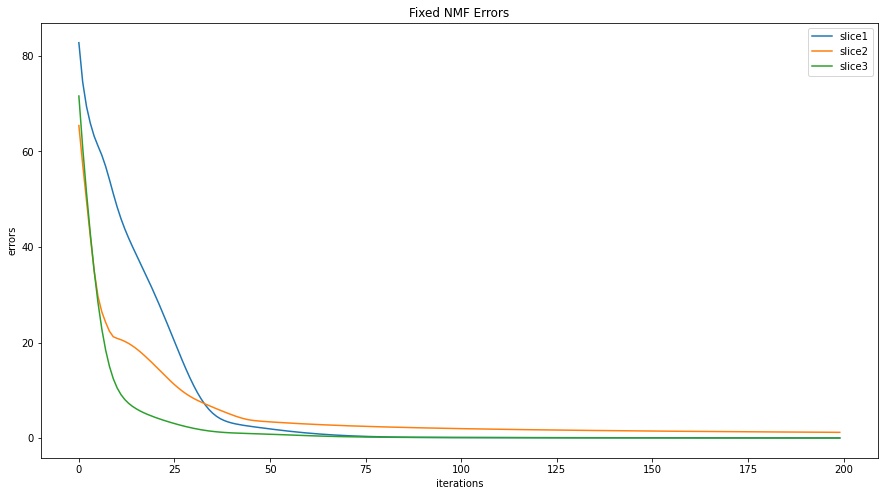

In [12]:
h,wf,e = fixed_NMF(T=tensor_test, rank=7, iters=200, plot_errors=True)

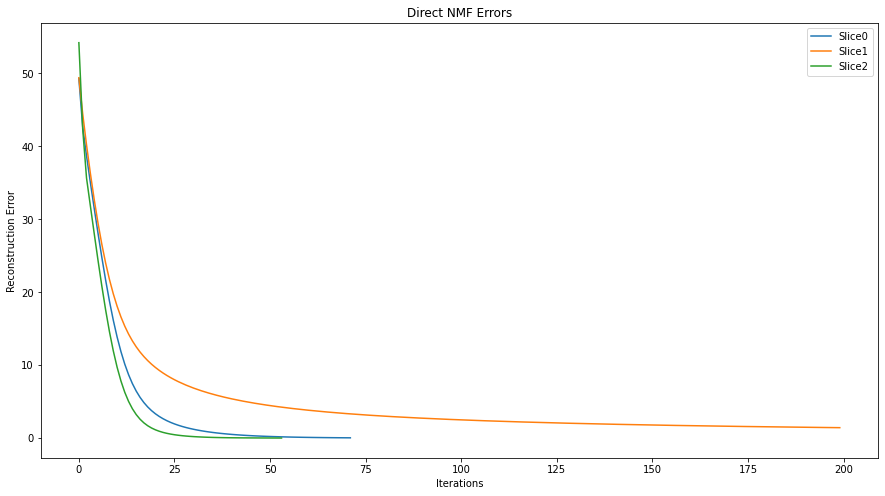

In [13]:
hs,ws = direct_NMF(tensor_test, rank=7, iters=200, tol=1e-3, plot_errors=True)

In [114]:
def reconstruction(H, W, fixed=False):

    if fixed:
        return np.dstack([H@W[0].T, H@W[1].T, H@W[2].T])

    else:
        return np.dstack([H[0]@W[0].T, H[1]@W[1].T, H[2]@W[2].T])


In [15]:
display(reconstruction(hs,ws, fixed=False), reconstruction(h, wf, fixed=True))


array([[[97.00051953, 77.0018574 , 84.00292185],
        [95.00058512, 91.99586451, 46.99871365],
        [63.99834398, 82.00289511, 25.99288297]],

       [[39.00075999, 94.00135941, 85.99687011],
        [51.9988428 , 90.9943369 , 25.00642142],
        [59.0005175 , 94.0041221 , 73.00148737]],

       [[48.99757221, 75.9997674 , 67.00010229],
        [83.00322535, 78.00014668, 78.00026774],
        [34.99574905, 31.00020118, 52.99947664]],

       [[81.99684943, 97.00238963, 85.99935492],
        [51.00504966, 54.99338759, 94.99888718],
        [15.00005162, 53.00248717, 14.01150414]],

       [[72.00425851, 77.99059756, 44.00146439],
        [86.99312444,  1.43456283, 39.99938756],
        [ 7.04138184, 57.97707708, 64.99938555]]])

array([[[97.00672098, 76.96768957, 83.99118757],
        [95.0127071 , 92.00503584, 47.01287184],
        [64.00242189, 82.00525578, 26.00518978]],

       [[38.99811544, 94.03102537, 86.00927672],
        [51.98228175, 90.98874159, 24.99151298],
        [58.99956463, 93.99271036, 72.99197447]],

       [[49.03014931, 75.97474936, 66.99330118],
        [83.02245125, 78.01317849, 78.00228797],
        [35.00496829, 30.99549992, 53.00509964]],

       [[81.99828153, 97.02649114, 86.00584618],
        [50.99533219, 54.97645756, 94.99651303],
        [15.01223013, 52.99739744, 13.98773416]],

       [[71.99759783, 77.98609776, 43.9949767 ],
        [87.01846207,  1.21799184, 39.99257174],
        [ 6.99907896, 57.99460123, 65.00796851]]])

In [16]:
tensor_test

array([[[97, 77, 84],
        [95, 92, 47],
        [64, 82, 26]],

       [[39, 94, 86],
        [52, 91, 25],
        [59, 94, 73]],

       [[49, 76, 67],
        [83, 78, 78],
        [35, 31, 53]],

       [[82, 97, 86],
        [51, 55, 95],
        [15, 53, 14]],

       [[72, 78, 44],
        [87,  0, 40],
        [ 7, 58, 65]]])

In [17]:
def initialize(tensor, rank, norm=True):

    tensor_shape = tensor.shape

    factors = [np.random.randint(10,20, size=(s,rank)).astype(float) for s in tensor_shape]

    if norm:

        factors = [f / np.linalg.norm(f, axis=0, ord=2) for f in factors]

    return factors


def nncp(tensor, rank,  norm=True, iters=100):

    #initialize a matrix for each mode of the tensor
    #shape should be (dimension x rank) for each dimension of the tensor

    factors = initialize(tensor=tensor, rank=rank, norm=norm)

In [46]:
# ten = np.random.randint(1,100,size=(2,2,3)).astype(float)
# factors = initialize(ten,2, norm=False)
n_modes = len(factors)

In [18]:
def f_unfold(tensor, mode=0):
    """Simple unfolding function
        Moves the `mode` axis to the beginning and reshapes in Fortran order
    """
    return np.reshape(np.moveaxis(tensor, mode,0), (tensor.shape[mode], -1), order='F')

In [19]:
def reorder(indices, mode):
    """Reorders the elements
    """
    indices = list(indices)
    element = indices.pop(mode)
    return ([element] + indices[::-1])

def c_unfold(tensor, mode=0):
    return np.transpose(tensor, reorder(range(tensor.ndim), mode)).reshape((tensor.shape[mode], -1))

In [137]:
def c_unfold(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1))

In [20]:
def khatri_rao(a,b):

    height = a.shape[0] * b.shape[0]
    width = b.shape[1]

    result = np.empty(shape=(height,width))

    for c in range(a.shape[1]):
        for r in range(a.shape[0]):

            result[r*b.shape[0]:(r+1)*b.shape[0], c] = a[r,c] * b[:, c]

    return result

In [138]:
factors = factors_longterm.copy()

In [141]:
clipping = 1e-3

for _ in range(100):

    for mode in range(n_modes):
       
        #isolate the current mode and only focus on the other modes

        isolated = [i for i in range(n_modes) if i != mode]

        
        #multiply the covariances of all non isolated modes 
     
        for pos, factor_dim in enumerate(isolated):
           
            if pos:

                accum *= factors[factor_dim].T@factors[factor_dim]
               
            
            else:

                accum = factors[factor_dim].T@factors[factor_dim]
                

        

        kr = khatri_rao(factors[isolated[0]], factors[isolated[1]])
        unfolded = c_unfold(ten, mode=mode)

        mttkrp = unfolded @ kr

        # mttkrp = tl.unfolding_dot_khatri_rao(ten, (None, factors), mode)

        mttkrp[mttkrp < clipping] = clipping

        denom = factors[mode] @ accum

        
        denom[denom < clipping] = clipping
    
        factor = factors[mode] * mttkrp / denom

        factors[mode] = factor


    reconstruction = tl.kruskal_to_tensor((None, factors))



In [136]:
tl_unfold(ten, mode=0)

array([[36., 35., 31., 61., 75., 97.],
       [16., 18., 16., 81., 66., 93.]])

In [140]:
tl.kruskal_to_tensor((None,factors))

array([[[35.99711328, 35.4500482 , 30.43412826],
        [61.00007729, 74.8665781 , 97.12762001]],

       [[15.99450438, 16.64361555, 17.43139303],
        [81.00230951, 66.25070806, 92.7830824 ]]])

In [124]:
ten

array([[[36., 35., 31.],
        [61., 75., 97.]],

       [[16., 18., 16.],
        [81., 66., 93.]]])

http://tensorly.org/stable/_modules/tensorly/random/base.html#random_cp
http://tensorly.org/stable/_modules/tensorly/decomposition/_nn_cp.html#non_negative_parafac


In [21]:
import tensorly as tl
from tensorly import decomposition

In [ ]:
'''
https://www.kolda.net/publication/TensorReview.pdf
'''

In [22]:
def initialize_nn_cp(tensor, rank, init='svd', svd='numpy_svd', random_state=None,
                     normalize_factors=False, nntype='nndsvda'):
    r"""Initialize factors used in `parafac`.

    The type of initialization is set using `init`. If `init == 'random'` then
    initialize factor matrices using `random_state`. If `init == 'svd'` then
    initialize the `m`th factor matrix using the `rank` left singular vectors
    of the `m`th unfolding of the input tensor.

    Parameters
    ----------
    tensor : ndarray
    rank : int
    init : {'svd', 'random'}, optional
    svd : str, default is 'numpy_svd'
        function to use to compute the SVD, acceptable values in tensorly.SVD_FUNS
    nntype : {'nndsvd', 'nndsvda'}
        Whether to fill small values with 0.0 (nndsvd), or the tensor mean (nndsvda, default).

    Returns
    -------
    factors : CPTensor
        An initial cp tensor.

    """
    rng = tl.check_random_state(random_state)


    if init == 'random':
        kt = random_cp(tl.shape(tensor), rank, normalise_factors=False, **tl.context(tensor))

    elif init == 'svd':
        try:
            svd_fun = tl.SVD_FUNS[svd]
        except KeyError:
            message = 'Got svd={}. However, for the current backend ({}), the possible choices are {}'.format(
                svd, tl.get_backend(), tl.SVD_FUNS)
            raise ValueError(message)

        factors = []
        for mode in range(tl.ndim(tensor)):
            U, S, V = svd_fun(unfold(tensor, mode), n_eigenvecs=rank)

            # Apply nnsvd to make non-negative
            U = make_svd_non_negative(tensor, U, S, V, nntype)

            if tensor.shape[mode] < rank:
                # TODO: this is a hack but it seems to do the job for now
                random_part = tl.tensor(rng.random_sample((U.shape[0], rank - tl.shape(tensor)[mode])), **tl.context(tensor))
                U = tl.concatenate([U, random_part], axis=1)

            factors.append(U[:, :rank])

        kt = CPTensor((None, factors))

    elif isinstance(init, (tuple, list, CPTensor)):
        # TODO: Test this
        try:
            kt = CPTensor(init)
        except ValueError:
            raise ValueError(
                'If initialization method is a mapping, then it must '
                'be possible to convert it to a CPTensor instance'
            )
    else:
        raise ValueError('Initialization method "{}" not recognized'.format(init))

    kt.factors = [tl.abs(f) for f in kt[1]]

    if normalize_factors:
        kt = cp_normalize(kt)

    return kt

In [71]:
w,factors = initialize_nn_cp(ten, 3)

In [23]:
def make_svd_non_negative(tensor, U, S, V, nntype):
    """ Use NNDSVD method to transform SVD results into a non-negative form. This
    method leads to more efficient solving with NNMF [1].

    Parameters
    ----------
    tensor : tensor being decomposed
    U, S, V: SVD factorization results
    nntype : {'nndsvd', 'nndsvda'}
        Whether to fill small values with 0.0 (nndsvd), or the tensor mean (nndsvda, default).

    [1]: Boutsidis & Gallopoulos. Pattern Recognition, 41(4): 1350-1362, 2008.
    """

    # NNDSVD initialization
    W = tl.zeros_like(U)
    H = tl.zeros_like(V)

    # The leading singular triplet is non-negative
    # so it can be used as is for initialization.
    W = tl.index_update(W, tl.index[:, 0], tl.sqrt(S[0]) * tl.abs(U[:, 0]))
    H = tl.index_update(H, tl.index[0, :], tl.sqrt(S[0]) * tl.abs(V[0, :]))

    for j in range(1, tl.shape(U)[1]):
        x, y = U[:, j], V[j, :]

        # extract positive and negative parts of column vectors
        x_p, y_p = tl.clip(x, a_min=0.0), tl.clip(y, a_min=0.0)
        x_n, y_n = tl.abs(tl.clip(x, a_max=0.0)), tl.abs(tl.clip(y, a_max=0.0))

        # and their norms
        x_p_nrm, y_p_nrm = tl.norm(x_p), tl.norm(y_p)
        x_n_nrm, y_n_nrm = tl.norm(x_n), tl.norm(y_n)

        m_p, m_n = x_p_nrm * y_p_nrm, x_n_nrm * y_n_nrm

        # choose update
        if m_p > m_n:
            u = x_p / x_p_nrm
            v = y_p / y_p_nrm
            sigma = m_p
        else:
            u = x_n / x_n_nrm
            v = y_n / y_n_nrm
            sigma = m_n

        lbd = tl.sqrt(S[j] * sigma)
        W = tl.index_update(W, tl.index[:, j], lbd * u)
        H = tl.index_update(H, tl.index[j, :], lbd * v)

    # After this point we no longer need H
    eps = tl.eps(tensor.dtype)

    if nntype == "nndsvd":
        W = soft_thresholding(W, eps)
    elif nntype == "nndsvda":
        avg = tl.mean(tensor)
        W = tl.where(W < eps, tl.ones(tl.shape(W), **tl.context(W)) * avg, W)
    else:
        raise ValueError(
            'Invalid nntype parameter: got %r instead of one of %r' %
            (nntype, ('nndsvd', 'nndsvda')))

    return W

In [107]:
from tensorly import unfold

In [25]:
from tensorly import index_update

In [26]:
from tensorly.cp_tensor import CPTensor

In [73]:
factors

[array([[ 7.8813555 ,  7.03239481,  0.30993141],
        [11.2952351 , 51.        ,  0.51434816]]),
 array([[10.60309381, 51.        ,  0.78498935],
        [ 8.81240923,  6.88000141,  0.94144533]]),
 array([[ 7.18174793,  5.0640217 , 51.        ],
        [ 6.37148537, 51.        ,  5.52774157],
        [10.03784915, 51.        , 51.        ]])]

In [75]:
def non_negative_parafac(tensor, rank, factors, n_iter_max=100, init='svd', svd='numpy_svd',
                         tol=10e-7, random_state=None, verbose=0, normalize_factors=False,
                         return_errors=False, mask=None, cvg_criterion='abs_rec_error',
                         fixed_modes=None):
    """
    Non-negative CP decomposition

    Uses multiplicative updates, see [2]_

    This is the same as parafac(non_negative=True).

    Parameters
    ----------
    tensor : ndarray
    rank   : int
            number of components
    n_iter_max : int
                 maximum number of iteration
    init : {'svd', 'random'}, optional
    svd : str, default is 'numpy_svd'
        function to use to compute the SVD, acceptable values in tensorly.SVD_FUNS
    tol : float, optional
          tolerance: the algorithm stops when the variation in
          the reconstruction error is less than the tolerance
    random_state : {None, int, np.random.RandomState}
    verbose : int, optional
        level of verbosity
    fixed_modes : list, default is None
        A list of modes for which the initial value is not modified.
        The last mode cannot be fixed due to error computation.

    Returns
    -------
    factors : ndarray list
            list of positive factors of the CP decomposition
            element `i` is of shape ``(tensor.shape[i], rank)``

    References
    ----------
    .. [2] Amnon Shashua and Tamir Hazan,
       "Non-negative tensor factorization with applications to statistics and computer vision",
       In Proceedings of the International Conference on Machine Learning (ICML),
       pp 792-799, ICML, 2005
    """
    epsilon = tl.eps(tensor.dtype)
    # rank = validate_cp_rank(tl.shape(tensor), rank=rank)

    if mask is not None and init == "svd":
        message = "Masking occurs after initialization. Therefore, random initialization is recommended."
        warnings.warn(message, Warning)

    weights, _ = initialize_nn_cp(tensor, rank, init=init, svd=svd,
                                        random_state=random_state,
                                        normalize_factors=normalize_factors)
    
    rec_errors = []
    norm_tensor = tl.norm(tensor, 2)
    
    if fixed_modes is None:
        fixed_modes = []

    if tl.ndim(tensor) - 1 in fixed_modes:
        warnings.warn('You asked for fixing the last mode, which is not supported while tol is fixed.\n The last mode will not be fixed. Consider using tl.moveaxis()')
        fixed_modes.remove(tl.ndim(tensor) - 1)
    modes_list = [mode for mode in range(tl.ndim(tensor)) if mode not in fixed_modes]

    for iteration in range(n_iter_max):
      
        if verbose > 1:
            print("Starting iteration", iteration + 1)
        for mode in modes_list:
            if verbose > 1:
                print("Mode", mode, "of", tl.ndim(tensor))

            accum = 1
            # khatri_rao(factors).tl.dot(khatri_rao(factors))
            # simplifies to multiplications
            sub_indices = [i for i in range(len(factors)) if i != mode]
            
            print('factors', factors,'\n\n')
            for i, e in enumerate(sub_indices):
                if i:
                    accum *= tl.dot(tl.transpose(factors[e]), factors[e])
                else:
                    accum = tl.dot(tl.transpose(factors[e]), factors[e])

            print('accum', accum, '\n\n')
            

            if mask is not None:
                tensor = tensor * mask + tl.cp_to_tensor((None, factors), mask=1 - mask)

            mttkrp = unfolding_dot_khatri_rao(tensor, (None, factors), mode)

            numerator = tl.clip(mttkrp, a_min=epsilon, a_max=None)
            denominator = tl.dot(factors[mode], accum)
            denominator = tl.clip(denominator, a_min=epsilon, a_max=None)
            factor = factors[mode] * numerator / denominator

            factors[mode] = factor

        if normalize_factors:
            weights, factors = cp_normalize((weights, factors))

        if tol:
            # ||tensor - rec||^2 = ||tensor||^2 + ||rec||^2 - 2*<tensor, rec>
            factors_norm = cp_norm((weights, factors))

            # mttkrp and factor for the last mode. This is equivalent to the
            # inner product <tensor, factorization>
            iprod = tl.sum(tl.sum(mttkrp * factor, axis=0) * weights)
            rec_error = tl.sqrt(tl.abs(norm_tensor**2 + factors_norm**2 - 2 * iprod)) / norm_tensor
            rec_errors.append(rec_error)
            if iteration >= 1:
                rec_error_decrease = rec_errors[-2] - rec_errors[-1]

                if verbose:
                    print("iteration {}, reconstraction error: {}, decrease = {}".format(iteration, rec_error, rec_error_decrease))

                if cvg_criterion == 'abs_rec_error':
                    stop_flag = abs(rec_error_decrease) < tol
                elif cvg_criterion == 'rec_error':
                    stop_flag = rec_error_decrease < tol
                else:
                    raise TypeError("Unknown convergence criterion")

                if stop_flag:
                    if verbose:
                        print("PARAFAC converged after {} iterations".format(iteration))
                    break
            else:
                if verbose:
                    print('reconstruction error={}'.format(rec_errors[-1]))

    cp_tensor = CPTensor((weights, factors))

    if return_errors:
        return cp_tensor, rec_errors
    else:
        return cp_tensor

[[  319162.00890342  1200228.65828062   352731.48682008   255806.54302074]
 [ 1200228.65828062 14027631.66296941   438514.64834045  3474864.54377233]
 [  352731.48682008   438514.64834045  2295503.41767861   140697.2283499 ]
 [  255806.54302074  3474864.54377233   140697.2283499   4444395.76214861]]
[[ 3.33058949  4.90538151  2.81502867  0.47663119]
 [ 4.90538151 10.31753395  4.45037441  2.01220286]
 [ 2.81502867  4.45037441 11.03808228  1.8929124 ]
 [ 0.47663119  2.01220286  1.8929124   3.85789878]]
[[4.00324786e+00 2.49661989e+00 7.15819124e-02 4.56915991e-02]
 [2.49661989e+00 5.58486129e+00 1.34423896e-02 2.49686132e-01]
 [7.15819124e-02 1.34423896e-02 1.62550527e-03 7.62738080e-05]
 [4.56915991e-02 2.49686132e-01 7.62738080e-05 2.18586978e-02]]


In [36]:
from tensorly import unfolding_dot_khatri_rao

In [40]:
tl.kruskal_to_tensor((None, ff))

array([[[35.99733655, 35.45037137, 30.43425387],
        [61.00018826, 74.85951474, 97.1326895 ]],

       [[15.99364592, 16.65729517, 17.41991403],
        [81.00229617, 66.25532265, 92.78005298]]])

In [41]:
ten

array([[[36., 35., 31.],
        [61., 75., 97.]],

       [[16., 18., 16.],
        [81., 66., 93.]]])

In [33]:
factors_longterm  = factors.copy()